## Project is related to lendingTree a company that connects Borrowers to Investors. Out goal is to pedict the possibility of a user to repy the loan. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
lending  = pd.read_csv("resources/loan_data.csv")

In [4]:
lending.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


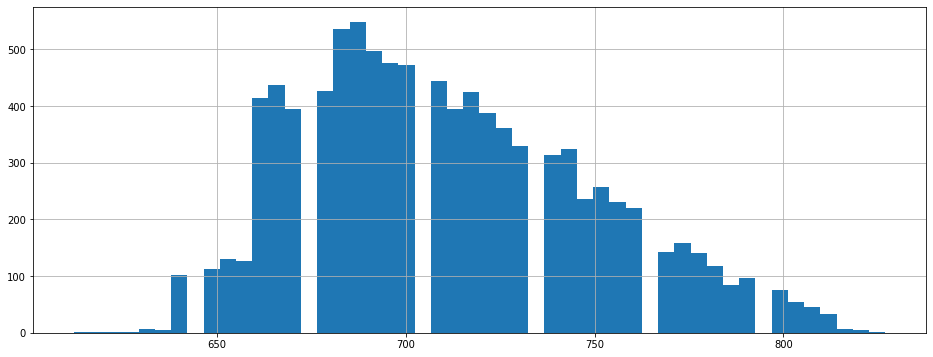

In [5]:
lending["fico"].hist(figsize = (16,6), bins = 50)

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

## We can see that the loan type "debt_consolidation" is least likely to be paid back


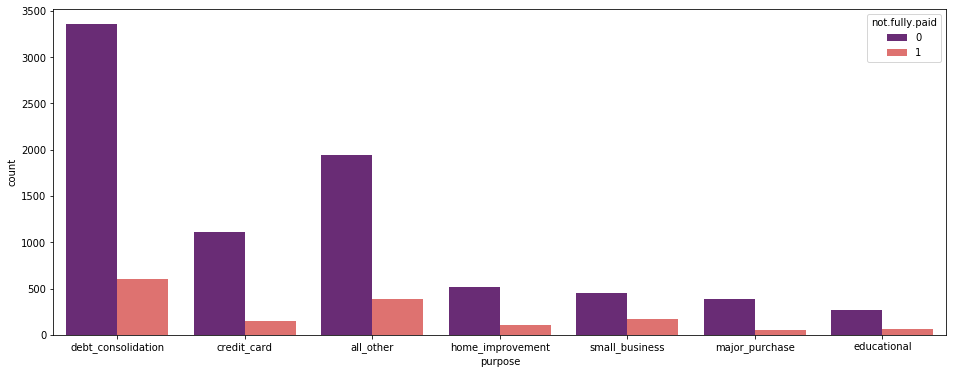

In [6]:
plt.figure(figsize=(16,6))
sns.countplot(x = "purpose", data=lending, hue="not.fully.paid", palette="magma")

## Lets observe lending tree interest rate in comparison to a members FICO Score

<Figure size 1152x432 with 0 Axes>

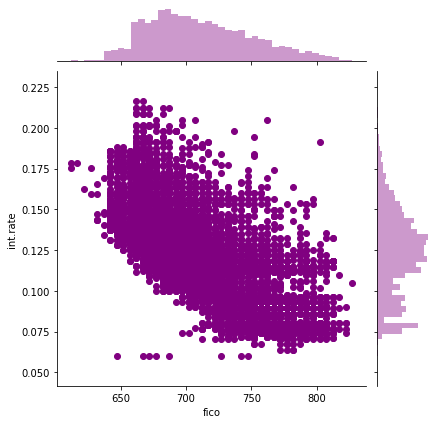

In [7]:
plt.figure(figsize=(16,6))
sns.jointplot(x = lending["fico"], y = lending["int.rate"], color="purple")

#### ** Lets also see if the trend differed between not.fully.paid and credit.policy. We ca nsee that there is amore of a frequency to not pay with policy 1 when the interest rates are higher and fico score is lower 

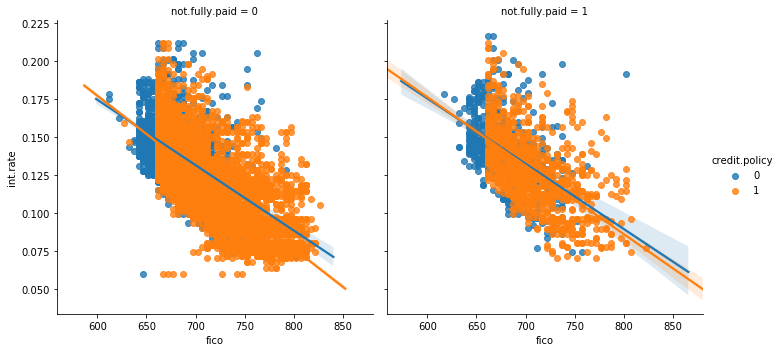

In [8]:
sns.lmplot(x = "fico", y = "int.rate", data=lending, col="not.fully.paid", hue='credit.policy')

## Setting up data for modeling. We will need to decide which features we will be using for our models before moving forward

## First the "purpose " data is caregorical so we wll need to transform the data set using pandas 

In [9]:
purpose_data = pd.get_dummies(lending["purpose"], drop_first=True)

In [10]:
final_data = pd.concat([lending, purpose_data], axis=1)

In [11]:
final_data.drop("purpose", inplace=True, axis=1)

### Lets Train and Split our data

In [12]:
X = final_data.drop("not.fully.paid", axis=1)
y = final_data["not.fully.paid"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
tree = DecisionTreeClassifier()

In [17]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
pred = tree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

## model was 85% Accurate using a decision tree. We will improve on this using random forest

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [21]:
print(confusion_matrix(y_test,pred))

[[2002  429]
 [ 337  106]]


### Random Forest -> Looks like the precision was approximately the same as the decision tree but looks like the recall and Fscore made significant improvment

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators=200)

In [24]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
predictions = rf.predict(X_test)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [27]:
print(confusion_matrix(y_test,predictions))

[[2420   11]
 [ 431   12]]


### Checking Random Card holder 
- We will test to see how accurate our model will predict if a user will pay a loan

In [76]:
from random import randint
random_index = randint(1, len(final_data))
random_holder = final_data.drop("not.fully.paid", axis=1).iloc[random_index]

In [77]:
X_train.shape

(6704, 18)

In [78]:
new_holder = random_holder.values.reshape(1,18)

In [79]:
tree.predict(new_holder)

array([1])

### True value

In [80]:
final_data.iloc[random_index]["not.fully.paid"]

1.0